In [72]:
from matplotlib import pyplot as plt
import numpy as np
import os
import json

In [73]:
resnetTriplet = "analysis_mat_resnet_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json"
resnetQuadruplet = "analysis_mat_resnet_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json"
convnextTinyTriplet = "analysis_mat_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json"
convnextTinyQuad = "analysis_mat_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json"

d = {
    "resnet18": "analysis_mat_resnet_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "resnet18 Pretrained": "analysis_matPre_resnet_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "resnet18 Quadruplet": "analysis_mat_resnet_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "resnet18 Quadruplet Pretrained": "analysis_matPre_resnet_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "convnext_tiny Triplet": "analysis_mat_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "convnext_tiny pretrained Triplet": "analysis_matPre_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "convnext_tiny Quadruplet": "analysis_mat_next_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "convnext_tiny Pretrained Quadruplet": "analysis_matPre_next_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w32_h224_seed224.json",
    "convnext_base Triplet": "analysis_matBase_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w8_h224_seed224.json",
    "convnext_base Quad": "analysis_matBase_next_flowers_quadrupletloss_quadrupletdata_epadam_lr25_m0_0001_bs0_9_w8_h224_seed224.json",
    "convnext_base Pretrained Triplet": "analysis_matBasePre_next_flowers_tripletloss_tripletdata_epadam_lr25_m0_0001_bs0_9_w8_h224_seed224.json",
    "convnext_large": "analysis_matLarge_next_flowers_tripletloss_tripletdata_epadam_lr15_m0_0001_bs0_9_w8_h224_seed224.json",
    "convnext_large Pretrained": "analysis_matLargePre_next_flowers_tripletloss_tripletdata_epadam_lr15_m0_0001_bs0_9_w8_h224_seed224.json",
    "ViT": "analysis_vitb16nopre_vit_flowers_tripletloss_tripletdata_epadam_lr10_m0_0001_bs0_9_w8_h224_seed224.json",
    "ViTPre": "analysis_vitb16Pre_vit_flowers_tripletloss_tripletdata_epadam_lr10_m0_0001_bs0_9_w8_h224_seed224.json",
    "ViT from GitHub": "melasViTPre.json"
}

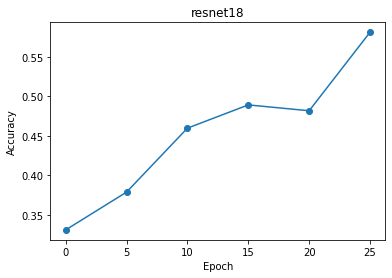

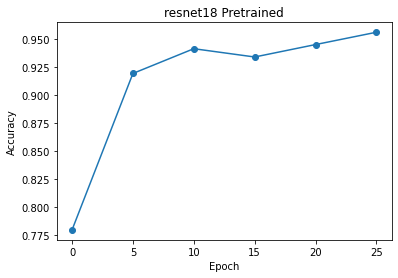

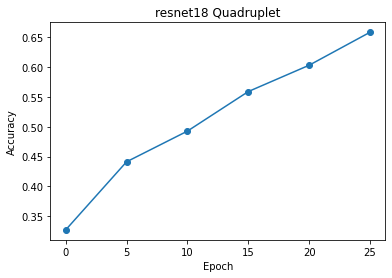

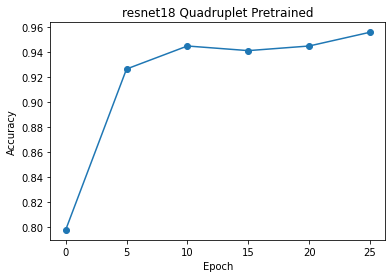

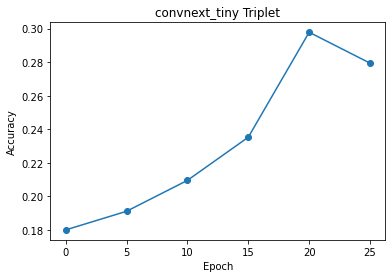

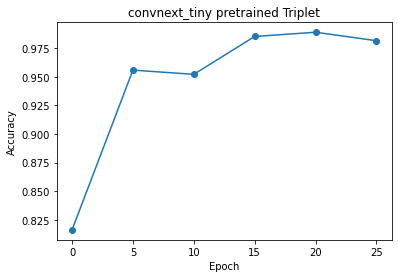

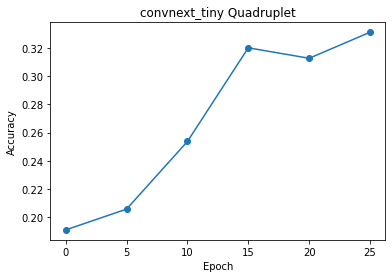

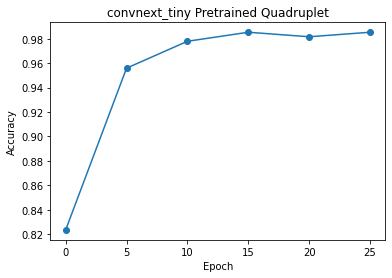

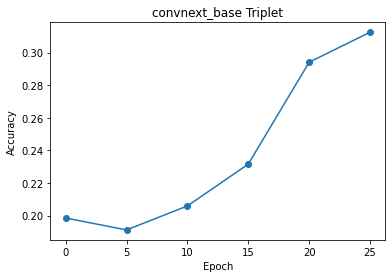

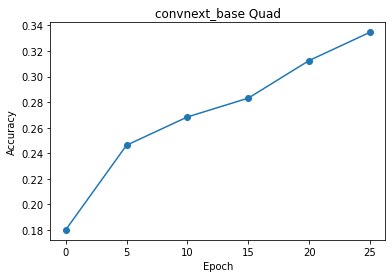

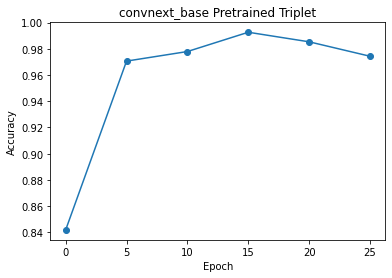

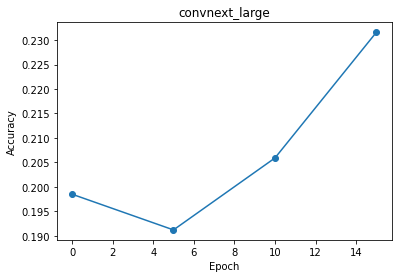

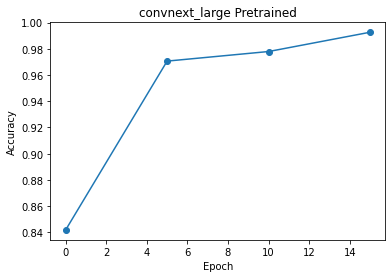

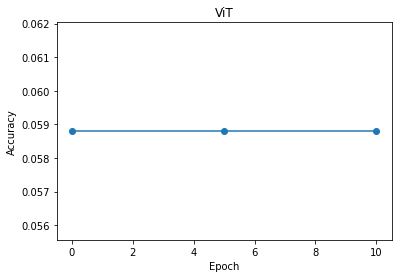

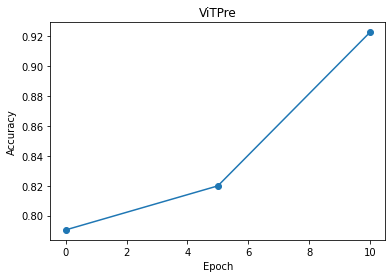

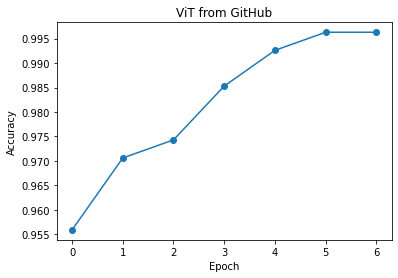

In [75]:
def getAccuracyFromPath(path):
    with open(path, 'r') as f:
        data = json.load(f)
    accD = data['acc']
    return {int(k): v['accuracy'] for k, v in accD.items()}

def plotAcc(title, valuesDict):
    plt.figure()
    plt.title(title)
    plt.xlabel("Epoch")
    # plt.xticks(x_values)
    plt.ylabel("Accuracy")
    # max_y = max(thing.values())
    # step = np.round(max_y/10, 1) if max_y > 0.5 else (np.round(max_y/10, 2) if max_y > 0.25 else np.round(max_y/10, 3))
    # max_y += step*2
    # plt.yticks(np.arange(0, max_y, step=step))
    plt.plot(*zip(*sorted(valuesDict.items())), 'o-')
    plt.show()

for title, path in d.items():
    plotAcc(title, getAccuracyFromPath(os.path.join("JSONlogs", path)))

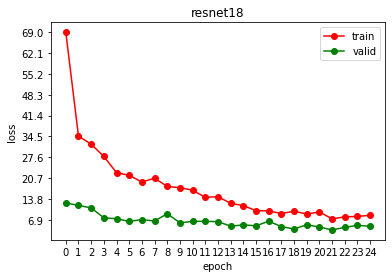

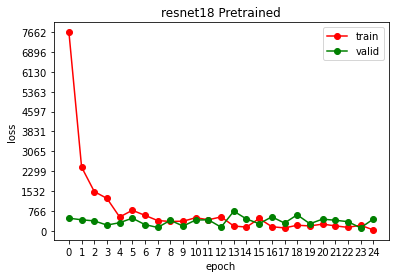

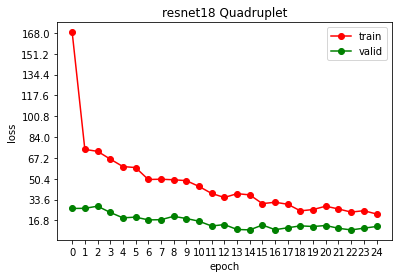

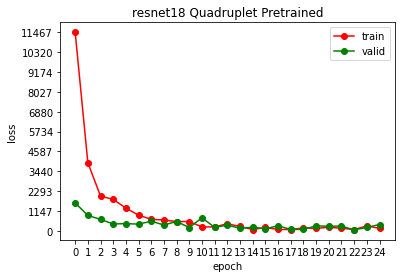

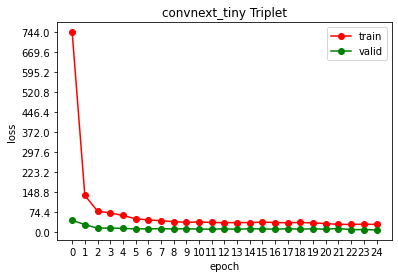

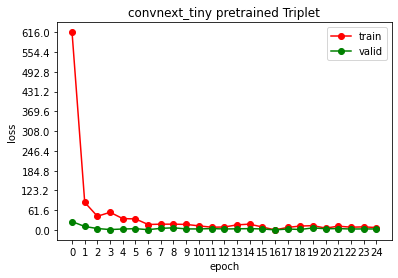

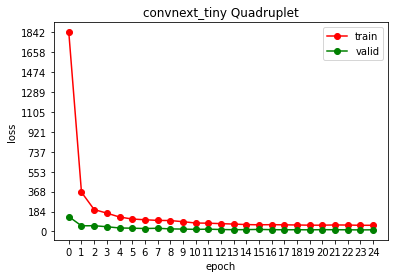

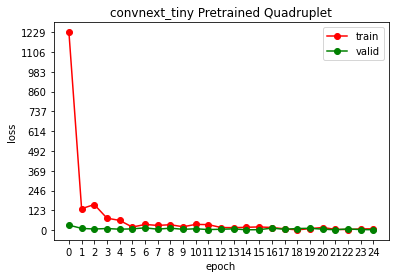

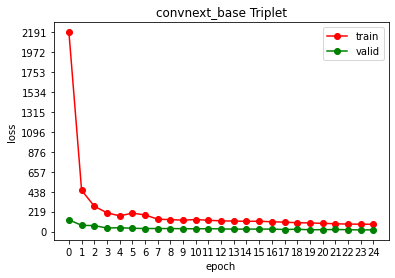

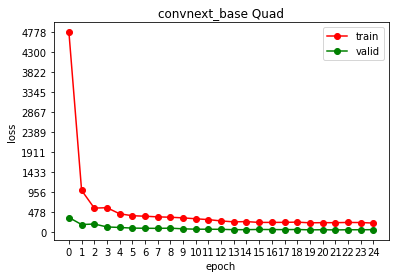

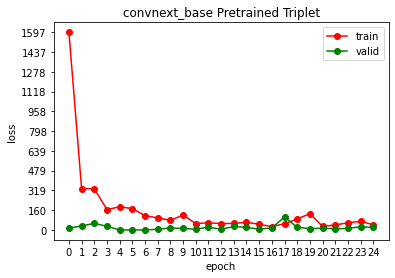

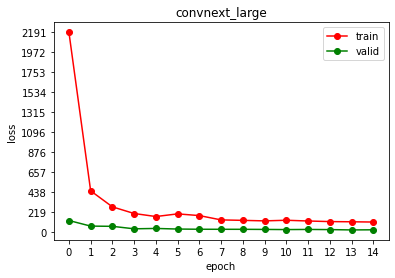

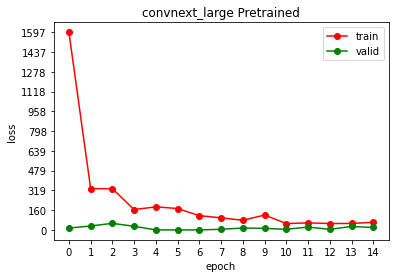

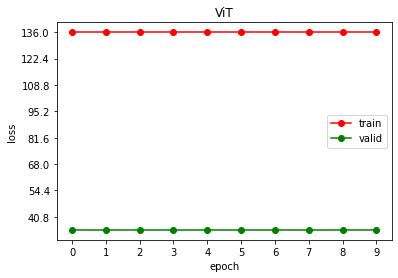

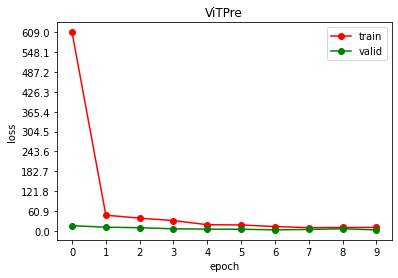

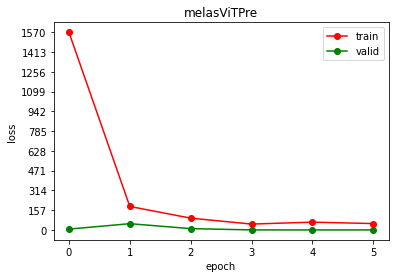

In [35]:
def getTrainVal(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data["train"], data["test"]

# train, test = getTrainVal(os.path.join("graphs", d["resnetTriplet"]))

def plot_learningcurve(title, train_history, validation_history, x_label, y_label):
    # Plot the training values and validation values as two separate curves
    plt.figure()
    plt.title(title)

    x_values = range(len(train_history))

    plt.xlabel(x_label)
    plt.xticks(x_values)
    plt.ylabel(y_label)
    max_y = max(max(train_history), max(validation_history))
    step = np.round(max_y/10, 1) if max_y > 0.5 else (np.round(max_y/10, 2) if max_y > 0.25 else np.round(max_y/10, 3))
    max_y += step*2
    # print(max_y, step)
    plt.yticks(np.arange(0, max_y, step=step))
    # plt.ylim(0, 1000)

    plt.plot(x_values, train_history, 'o-', color="r", label="train")
    plt.plot(x_values, validation_history, 'o-', color="g", label="valid")

    plt.legend(loc="best")
    plt.savefig(os.path.join("imgs1", title.replace(" ", "_") + ".png"))
    plt.show()

def plotFromItem(title, path):
    train, test = getTrainVal(os.path.join("graphs", path))
    plot_learningcurve(title, train, test, "epoch", "loss")

for title, pth in d.items():
    plotFromItem(title, pth)